In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
import json

# Function to load configurations
def load_config(config_file):
    with open(config_file, 'r') as file:
        config = json.load(file)
    return config

# Load the configuration
config = load_config('config/config.json')

# Access the dataset path
dataset_dir = config['dataset_path']
train_dir = config['train_path']
val_dir = config['val_path']
test_dir = config['test_path']

In [3]:

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for sublabel in os.listdir(label_path):
                sublabel_path = os.path.join(label_path, sublabel)
                if os.path.isdir(sublabel_path):
                    for filename in os.listdir(sublabel_path):
                        img_path = os.path.join(sublabel_path, filename)
                        try:
                            with Image.open(img_path) as img:
                                img = img.convert('L')
                                img = img.resize((512, 512))
                                img_array = np.array(img).flatten()
                                images.append(img_array)
                                labels.append(label)
                        except Exception as e:
                            print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

In [4]:
X_train, y_train = load_images_from_folder(train_dir)
X_val, y_val = load_images_from_folder(val_dir)

In [5]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

In [6]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_classifier.predict(X_val)

In [10]:
# Compute metrics
accuracy = accuracy_score(y_val_encoded, y_pred)
precision = precision_score(y_val_encoded, y_pred, average='weighted')
recall = recall_score(y_val_encoded, y_pred, average='weighted')
f1 = f1_score(y_val_encoded, y_pred, average='weighted')

# Create a DataFrame to display metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Print the metrics DataFrame
print(metrics_df.to_string(index=False))

   Metric    Score
 Accuracy 0.500000
Precision 0.625000
   Recall 0.500000
 F1 Score 0.433333


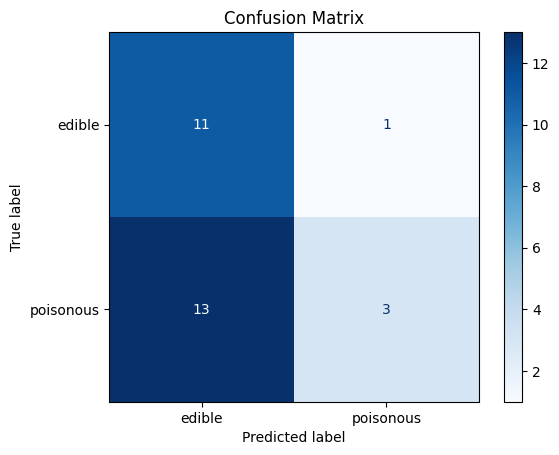

In [ ]:
cm = confusion_matrix(y_val_encoded, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix Random Fores")
plt.show()